<a href="https://colab.research.google.com/github/The-cheater/dogs-cats/blob/main/Dogs%26cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


!pip install tensorflow


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os


In [4]:
import tensorflow_datasets as tfds
(raw_train, raw_validation), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],  #80%training and 20%validation
    with_info=True,
    as_supervised=True, # each example  returned hoga tuple mein (image, label)
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.5OOGOR_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [8]:
IMG_SIZE = 160  # Image will be resized to 160x160

# This function formats each image and label
def format_example(image, label):
    image = tf.cast(image, tf.float32)        # Convert to float
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize
    image = image / 255.0                     # Normalize to [0, 1]
    return image, label

# Apply the formatting to the raw datasets
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)

(raw_train, raw_validation), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True
)


In [9]:
#optimize
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation.batch(BATCH_SIZE).prefetch(1)


In [10]:
base_model.trainable = False
from tensorflow.keras import layers, models

# Create the model
model = models.Sequential([
    base_model,  # Pre-trained base
    layers.GlobalAveragePooling2D(),  # Reduces output size
    layers.Dense(1, activation='sigmoid')  # Final classification layer
])


In [11]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [12]:
#train
EPOCHS = 5

history = model.fit(
    train_batches,
    epochs=EPOCHS,
    validation_data=validation_batches
)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 51s 69ms/step - accuracy: 0.9421 - loss: 0.1508 - val_accuracy: 0.9791 - val_loss: 0.0617
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 68s 53ms/step - accuracy: 0.9794 - loss: 0.0588 - val_accuracy: 0.9783 - val_loss: 0.0594
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - accuracy: 0.9820 - loss: 0.0514 - val_accuracy: 0.9785 - val_loss: 0.0589
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 33s 55ms/step - accuracy: 0.9844 - loss: 0.0482 - val_accuracy: 0.9785 - val_loss: 0.0597
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 45s 62ms/step - accuracy: 0.9855 - loss: 0.0430 - val_accuracy: 0.9789 - val_loss: 0.0588


In [13]:
# Unfreeze the base model
base_model.trainable = True

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fine-tune with a few more epochs
fine_tune_epochs = 5

history_fine = model.fit(train_batches,
                         epochs=fine_tune_epochs,
                         validation_data=validation_batches)


Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 112s 114ms/step - accuracy: 0.9235 - loss: 0.1908 - val_accuracy: 0.9783 - val_loss: 0.0651
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 46s 77ms/step - accuracy: 0.9740 - loss: 0.0688 - val_accuracy: 0.9798 - val_loss: 0.0599
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 49s 82ms/step - accuracy: 0.9804 - loss: 0.0520 - val_accuracy: 0.9811 - val_loss: 0.0535
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 49s 83ms/step - accuracy: 0.9892 - loss: 0.0333 - val_accuracy: 0.9807 - val_loss: 0.0520
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 77s 74ms/step - accuracy: 0.9910 - loss: 0.0257 - val_accuracy: 0.9813 - val_loss: 0.0543


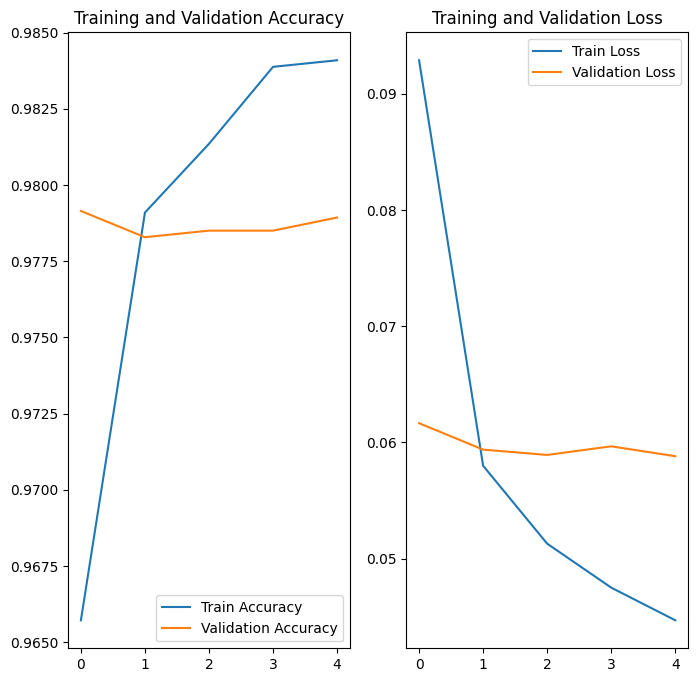

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [15]:
from google.colab import files
from tensorflow.keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension

    predictions = model.predict(img_array)
    class_names = ['Cat', 'Dog']
    print("Prediction:", class_names[int(predictions[0] > 0.5)])


Saving Screenshot 2025-05-19 153318.png to Screenshot 2025-05-19 153318.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction: Dog


<ipython-input-15-31fa12ff563d>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Prediction:", class_names[int(predictions[0] > 0.5)])
